In [1]:
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting utility functions

In [2]:
LINEWIDTH = 1.0


def plot_geometry():
    plt.figure(figsize=(10, 4))
    plt.plot(df_topo.x, -df_topo.y, label="topo.csv", linewidth=LINEWIDTH)
    plt.plot(df_mbt.x, -df_mbt.y, label="mbt.csv", linewidth=LINEWIDTH)
    plt.plot(df_mct.x, -df_mct.y, label="mct.csv", linewidth=LINEWIDTH)
    plt.plot(df_base.x, -df_base.y, label="base.csv", linewidth=LINEWIDTH)
    plt.plot(df_ramp_mft.x, -df_ramp_mft.y, label="ramp_mft.csv", linewidth=LINEWIDTH)
    plt.legend()
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    plt.gca().set_aspect("equal")
    plt.show()


def plot_coord_indices(df1, df2, x_range, y_range):
    plt.figure(figsize=(10, 4))
    for i in range(len(df1)):
        plt.plot(df1.x.values[i], -df1.y.values[i], "rx")
        plt.text(df1.x.values[i], -df1.y.values[i], str(i), color="r", clip_on=True)
    for i in range(len(df2)):
        plt.plot(df2.x.values[i], -df2.y.values[i], "b.")
        plt.text(df2.x.values[i], -df2.y.values[i], str(i), color="b", clip_on=True)
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    plt.gca().set_clip_on(True)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.gca().set_aspect("equal")
    plt.show()

# Read in initial files digitized with Plot Digitizer

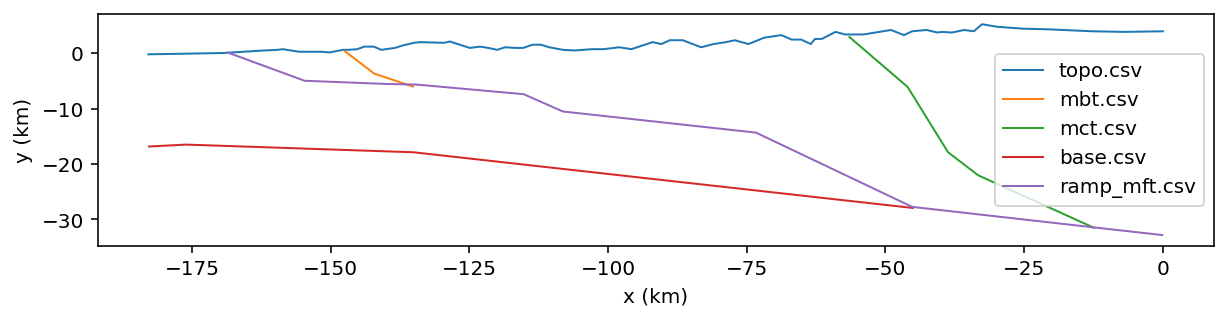

In [3]:
df_topo = pd.read_csv("topo.csv")
df_mbt = pd.read_csv("mbt.csv")
df_mct = pd.read_csv("mct.csv")
df_base = pd.read_csv("base.csv")
df_ramp_mft = pd.read_csv("ramp_mft.csv")
plot_geometry()

# TODO:
0. Truncate to three digits of precision
1. Colocate top of MCT with topo
2. Colocate bottom of MCT with ramp
3. Colocate top of MFT with topo
4. Colocate top of MBT with topo
5. Colocate bottom of MBT with ramp
6. Colocate top of base with ramp at intersection
7. Fix far-left base so that it doesn't increase depth
8. Align topo and ramp x-coordinate at right edge
9. Align topo and base x-coordinate at left edge
10. Add vertical left edge
11. Add vertical right edge
12. Rescale all x-coordinates

# Truncate x and y coordinates to three digits of precision

In [4]:
TRUNCATION_FACTOR = 1000
df_topo = np.trunc(TRUNCATION_FACTOR * df_topo) / TRUNCATION_FACTOR
df_mbt = np.trunc(TRUNCATION_FACTOR * df_mbt) / TRUNCATION_FACTOR
df_mct = np.trunc(TRUNCATION_FACTOR * df_mct) / TRUNCATION_FACTOR
df_base = np.trunc(TRUNCATION_FACTOR * df_base) / TRUNCATION_FACTOR
df_ramp_mft = np.trunc(TRUNCATION_FACTOR * df_ramp_mft) / TRUNCATION_FACTOR

# Colocate top of MCT with topography

In [5]:
x_range = [-75, -25]
y_range = [0, 5]
# plot_coord_indices(df_topo, df_mct, x_range, y_range)
df_mct.x.values[0] = df_topo.x.values[55]
df_mct.y.values[0] = df_topo.y.values[55]
# plot_coord_indices(df_topo, df_mct, x_range, y_range)

# Colocate bottom of MCT with ramp

In [6]:
x_range = [-15, -10]
y_range = [-31, -32]
# plot_coord_indices(df_ramp_mft, df_mct, x_range, y_range)
df_mct.x.values[4] = df_ramp_mft.x.values[8]
df_mct.y.values[4] = df_ramp_mft.y.values[8]
# plot_coord_indices(df_ramp_mft, df_mct, x_range, y_range)

# Collocate top of MFT with topography

In [7]:
x_range = [-175, -150]
y_range = [-1, 1]
# plot_coord_indices(df_topo, df_ramp_mft, x_range, y_range)
df_ramp_mft.x.values[0] = df_topo.x.values[1]
df_ramp_mft.y.values[0] = df_topo.y.values[1]
# plot_coord_indices(df_topo, df_ramp_mft, x_range, y_range)

# Colocate top of MBT with topography

In [8]:
x_range = [-150, -125]
y_range = [-1, 2]
# plot_coord_indices(df_topo, df_mbt, x_range, y_range)
df_mbt.x.values[0] = df_topo.x.values[8]
df_mbt.y.values[0] = df_topo.y.values[8]
# plot_coord_indices(df_topo, df_mbt, x_range, y_range)

# Colocate bottom of MBT with ramp

In [9]:
x_range = [-200, -100]
y_range = [-30, 5]
# plot_coord_indices(df_ramp_mft, df_mbt, x_range, y_range)
df_mbt.x.values[2] = df_ramp_mft.x.values[3]
df_mbt.y.values[2] = df_ramp_mft.y.values[3]
# plot_coord_indices(df_ramp_mft, df_mbt, x_range, y_range)

# Colocate base with ramp at lower intersections

In [10]:
x_range = [-50, -25]
y_range = [-40, -20]
# plot_coord_indices(df_ramp_mft, df_base, x_range, y_range)
df_base.x.values[0] = df_ramp_mft.x.values[7]
df_base.y.values[0] = df_ramp_mft.y.values[7]
# plot_coord_indices(df_ramp_mft, df_base, x_range, y_range)

# Fix far-left so that it doesn't increase depth at end point

In [11]:
x_range = [-200, -175]
y_range = [-20, -10]
# plot_coord_indices(df_base, df_base, x_range, y_range)
df_base.y.values[3] = df_base.y.values[2]
# plot_coord_indices(df_base, df_base, x_range, y_range)

# Align topography and ramp x-coordinates at right edge

In [12]:
x_range = [-10, 100]
y_range = [-40, 5]
# plot_coord_indices(df_ramp_mft, df_topo, x_range, y_range)
df_topo.x.values[72] = 0.0
df_ramp_mft.x.values[9] = 0.0
# plot_coord_indices(df_ramp_mft, df_topo, x_range, y_range)

# Align topography and base x-coordinates at left edge

In [13]:
x_range = [-200, -175]
y_range = [-20, 5]
# plot_coord_indices(df_base, df_topo, x_range, y_range)
df_base.x.values[3] = -183.0
df_topo.x.values[0] = -183.0
# plot_coord_indices(df_base, df_topo, x_range, y_range)

# Add vertical right edge

In [14]:
x_range = [-10, 10]
y_range = [-40, 5]
# plot_coord_indices(df_ramp_mft, df_topo, x_range, y_range)
df_right_edge = pd.DataFrame(
    {
        "x": [df_ramp_mft.x.values[9], df_topo.x.values[72]],
        "y": [df_ramp_mft.y.values[9], df_topo.y.values[72]],
    }
)
# plot_coord_indices(df_right_edge, df_right_edge, x_range, y_range)

# Add vertical left edge

In [15]:
x_range = [-200, -175]
y_range = [-20, 5]
# plot_coord_indices(df_base, df_topo, x_range, y_range)
df_left_edge = pd.DataFrame(
    {
        "x": [df_base.x.values[3], df_topo.x.values[0]],
        "y": [df_base.y.values[3], df_topo.y.values[0]],
    }
)
# plot_coord_indices(df_left_edge, df_left_edge, x_range, y_range)

# Create extended topography

In [16]:
EXTEND_DISTANCE = 500  # km

# Extend topo to left
min_idx = np.where(df_topo.x == df_topo.x.min())[0]
min_x = df_topo.x.values[min_idx]
min_y = df_topo.y.values[min_idx]
df_left_topo = pd.DataFrame(
    {
        "x": [min_x - EXTEND_DISTANCE, min_x],
        "y": [min_y, min_y],
    }
)

# Extend topo to right
max_idx = np.where(df_topo.x == df_topo.x.max())[0]
max_x = df_topo.x.values[max_idx]
max_y = df_topo.y.values[max_idx]
df_right_topo = pd.DataFrame(
    {
        "x": [max_x + EXTEND_DISTANCE, max_x],
        "y": [max_y, max_y],
    }
)

# Rescale all x-coordinates

# Truncate to three digits of accuracy again

# Plot all surfaces

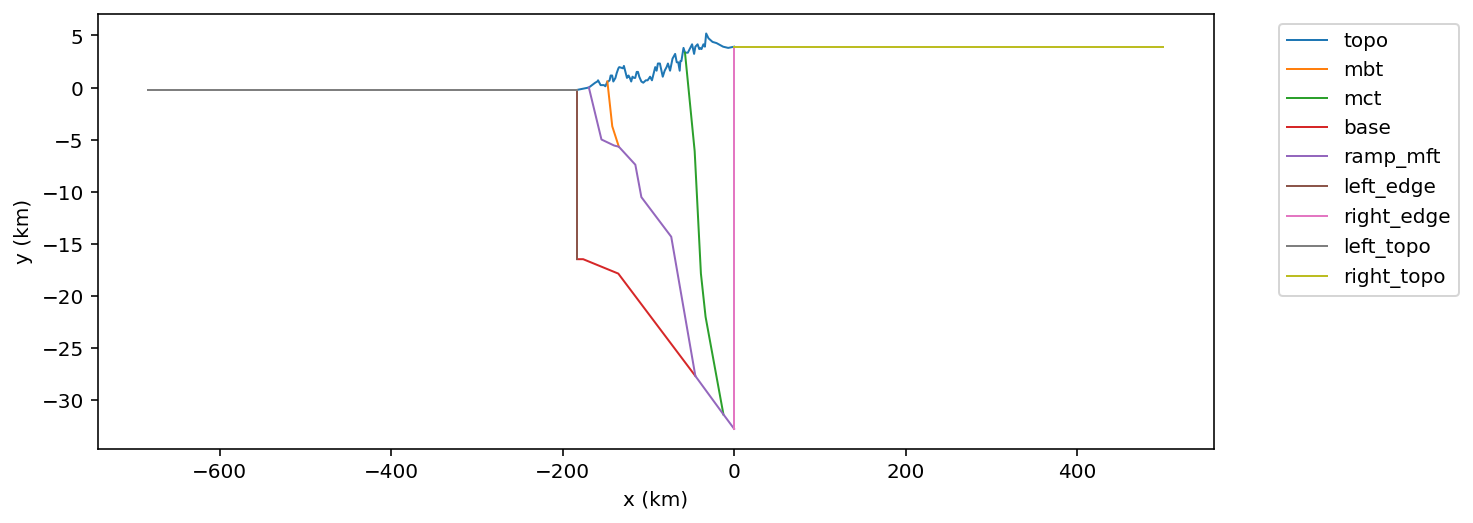

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(df_topo.x, -df_topo.y, label="topo", linewidth=LINEWIDTH)
plt.plot(df_mbt.x, -df_mbt.y, label="mbt", linewidth=LINEWIDTH)
plt.plot(df_mct.x, -df_mct.y, label="mct", linewidth=LINEWIDTH)
plt.plot(df_base.x, -df_base.y, label="base", linewidth=LINEWIDTH)
plt.plot(df_ramp_mft.x, -df_ramp_mft.y, label="ramp_mft", linewidth=LINEWIDTH)
plt.plot(df_left_edge.x, -df_left_edge.y, label="left_edge", linewidth=LINEWIDTH)
plt.plot(df_right_edge.x, -df_right_edge.y, label="right_edge", linewidth=LINEWIDTH)
plt.plot(df_left_topo.x, -df_left_topo.y, label="left_topo", linewidth=LINEWIDTH)
plt.plot(df_right_topo.x, -df_right_topo.y, label="right_topo", linewidth=LINEWIDTH)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.xlabel("x (km)")
plt.ylabel("y (km)")
# plt.gca().set_aspect("equal")
plt.show()

# Convert point-wise geometry specification to element-wise geometry specification

In [18]:
def convert_point_df_to_segment_df(df, collection="mbt"):
    n_segs = len(df) - 1
    x1 = np.zeros(n_segs)
    x2 = np.zeros(n_segs)
    y1 = np.zeros(n_segs)
    y2 = np.zeros(n_segs)
    for i in range(n_segs):
        x1[i] = df.x[i]
        y1[i] = df.y[i]
        x2[i] = df.x[i + 1]
        y2[i] = df.y[i + 1]

    # Build new segment based dataframe
    df_segment = pd.DataFrame(
        {
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2,
        }
    )
    df_segment["collection"] = collection

    # Names/indices for each element of a collection
    # Might be useful for convenience
    df_segment["name"] = np.arange(n_segs)

    # The next three lines set default values as that are
    # likely to be hand tuned later
    df_segment["bc_type"] = "u"
    df_segment["bc_x_s"] = 0
    df_segment["bc_y_n"] = 0
    return df_segment


def chop_segments(df, max_seg_length):
    df_chop_all = pd.DataFrame()
    for i in range(len(df)):
        seg_length = np.sqrt(
            (df.x1.values[i] - df.x2.values[i]) ** 2.0
            + (df.y1.values[i] - df.y2.values[i]) ** 2.0
        )

        if seg_length > max_seg_length:
            n_chop_segs = np.ceil(seg_length / max_seg_length).astype(int)
            x_new = np.linspace(df.x1.values[i], df.x2.values[i], n_chop_segs + 1)
            y_new = np.linspace(df.y1.values[i], df.y2.values[i], n_chop_segs + 1)
            x1_new = x_new[0:-1]
            y1_new = y_new[0:-1]
            x2_new = x_new[1::]
            y2_new = y_new[1::]

            # Create dataframe from chopped coordinates
            df_chop = pd.DataFrame(
                {
                    "x1": x1_new,
                    "y1": y1_new,
                    "x2": x2_new,
                    "y2": y2_new,
                }
            )
            # Copy over properties from initial segment
            df_chop["collection"] = df.collection[i]
            df_chop["name"] = np.arange(n_chop_segs)
            df_chop["bc_type"] = df.bc_type[i]
            df_chop["bc_x_s"] = df.bc_x_s[i]
            df_chop["bc_y_n"] = df.bc_y_n[i]
            df_chop_all = df_chop_all.append(df_chop, ignore_index=True)
        else:
            df_chop_all = df_chop_all.append(df.iloc[[i]], ignore_index=True)
    return df_chop_all


# Convert to segment form
df_topo_segs = convert_point_df_to_segment_df(df_topo, collection="topo")
df_mbt_segs = convert_point_df_to_segment_df(df_mbt, collection="mbt")
df_mct_segs = convert_point_df_to_segment_df(df_mct, collection="mct")
df_base_segs = convert_point_df_to_segment_df(df_base, collection="base")
df_ramp_mft_segs = convert_point_df_to_segment_df(df_ramp_mft, collection="ramp_mft")
df_left_edge_segs = convert_point_df_to_segment_df(df_left_edge, collection="left_edge")
df_right_edge_segs = convert_point_df_to_segment_df(
    df_right_edge, collection="right_edge"
)
df_left_topo_segs = convert_point_df_to_segment_df(df_left_topo, collection="left_topo")
df_right_topo_segs = convert_point_df_to_segment_df(
    df_right_topo, collection="right_topo"
)


# Chop segments
max_seg_length = 5.0
df_topo_segs = chop_segments(df_topo_segs, max_seg_length)
df_mbt_segs = chop_segments(df_mbt_segs, max_seg_length)
df_mct_segs = chop_segments(df_mct_segs, max_seg_length)
df_base_segs = chop_segments(df_base_segs, max_seg_length)
df_ramp_mft_segs = chop_segments(df_ramp_mft_segs, max_seg_length)
df_left_edge_segs = chop_segments(df_left_edge_segs, max_seg_length)
df_right_edge_segs = chop_segments(df_right_edge_segs, max_seg_length)
df_left_topo_segs = chop_segments(df_left_topo_segs, max_seg_length)
df_right_topo_segs = chop_segments(df_right_topo_segs, max_seg_length)


# Combine all dataframes into one
df_mht = pd.DataFrame()
df_mht = df_mht.append(df_topo_segs, ignore_index=True)
df_mht = df_mht.append(df_mbt_segs, ignore_index=True)
df_mht = df_mht.append(df_mct_segs, ignore_index=True)
df_mht = df_mht.append(df_base_segs, ignore_index=True)
df_mht = df_mht.append(df_ramp_mft_segs, ignore_index=True)
df_mht = df_mht.append(df_left_edge_segs, ignore_index=True)
df_mht = df_mht.append(df_right_edge_segs, ignore_index=True)
df_mht = df_mht.append(df_left_topo_segs, ignore_index=True)
df_mht = df_mht.append(df_right_topo_segs, ignore_index=True)


# Truncate digits again
df_mht.x1 = np.trunc(TRUNCATION_FACTOR * df_mht.x1) / TRUNCATION_FACTOR
df_mht.y1 = np.trunc(TRUNCATION_FACTOR * df_mht.y1) / TRUNCATION_FACTOR
df_mht.x2 = np.trunc(TRUNCATION_FACTOR * df_mht.x2) / TRUNCATION_FACTOR
df_mht.y2 = np.trunc(TRUNCATION_FACTOR * df_mht.y2) / TRUNCATION_FACTOR

/var/folders/pq/qqjshcd51vg5t9w5ws8wkmw00000gn/T/ipykernel_52919/3816905089.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_chop_all = df_chop_all.append(df_chop, ignore_index=True)
/var/folders/pq/qqjshcd51vg5t9w5ws8wkmw00000gn/T/ipykernel_52919/3816905089.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_chop_all = df_chop_all.append(df_chop, ignore_index=True)
/var/folders/pq/qqjshcd51vg5t9w5ws8wkmw00000gn/T/ipykernel_52919/3816905089.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_chop_all = df_chop_all.append(df.iloc[[i]], ignore_index=True)
/var/folders/pq/qqjshcd51vg5t9w5ws8wkmw00000gn/T/ipykernel_52919/3816905089.py:68: FutureWarning: The frame.append method is deprecated and will be removed fr

# Flip vertical sign and plot

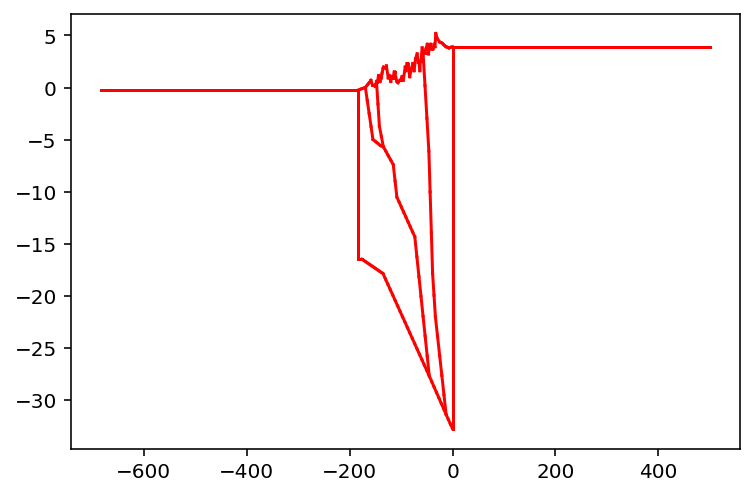

In [19]:
df_mht.y1 *= -1
df_mht.y2 *= -1

plt.figure()
for i in range(len(df_mht)):
    plt.plot(
        [df_mht.x1.values[i], df_mht.x2.values[i]],
        [df_mht.y1.values[i], df_mht.y2.values[i]],
        "-r",
    )
# plt.gca().set_aspect("equal")
plt.show()

# Assign slip rates on `ramp_mft` and `mbt`

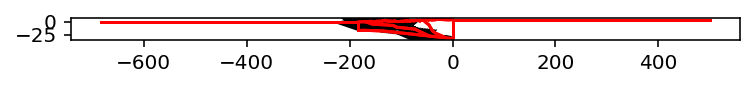

In [20]:
df = df_mht[df_mht.collection == "mbt"]
angle = np.zeros(len(df))
slip_rate_mbt = 3.0
sx_mbt = np.zeros(len(df))
sy_mbt = np.zeros(len(df))
midx_mbt = (df.x1.values + df.x2.values) / 2.0
midy_mbt = (df.y1.values + df.y2.values) / 2.0

for i in range(len(df)):
    dx = df.x2.values[i] - df.x1.values[i]
    dy = df.y2.values[i] - df.y1.values[i]
    angle[i] = np.arctan2(dy, dx)
    sx_mbt[i] = -slip_rate_mbt * np.cos(angle[i])
    sy_mbt[i] = -slip_rate_mbt * np.sin(angle[i])

plt.figure()
for i in range(len(df_mht)):
    plt.plot(
        [df_mht.x1.values[i], df_mht.x2.values[i]],
        [df_mht.y1.values[i], df_mht.y2.values[i]],
        "-r",
    )
plt.gca().set_aspect("equal")

df = df_mht[df_mht.collection == "ramp_mft"]
angle = np.zeros(len(df))
slip_rate_ramp_mft = 17.0
sx_ramp_mft = np.zeros(len(df))
sy_ramp_mft = np.zeros(len(df))
midx_ramp_mft = (df.x1.values + df.x2.values) / 2.0
midy_ramp_mft = (df.y1.values + df.y2.values) / 2.0

for i in range(len(df)):
    dx = df.x2.values[i] - df.x1.values[i]
    dy = df.y2.values[i] - df.y1.values[i]
    angle[i] = np.arctan2(dy, dx)
    sx_ramp_mft[i] = -slip_rate_ramp_mft * np.cos(angle[i])
    sy_ramp_mft[i] = -slip_rate_ramp_mft * np.sin(angle[i])

midx = np.concatenate((midx_mbt, midx_ramp_mft))
midy = np.concatenate((midy_mbt, midy_ramp_mft))
sx = np.concatenate((sx_mbt, sx_ramp_mft))
sy = np.concatenate((sy_mbt, sy_ramp_mft))
plt.quiver(midx, midy, sx, sy)
plt.show()

# Assign boundary conditions
- topo, t, bc_x = 0, bc_y = 0
- left_edge, u, bc_x = 0, bc_y = 0
- right_edge, u, bc_x = -20 # mm/yr, bc_y = 0

- base : Maybe eliminate this along with the left hand side vertical segment? We'd have to shorten the topo so that it terminates at the MFT.

- mbt: Some small slip rate (e.g., 5 mm/yr)

- ramp_mft: Spatially variable strike slip at element centroids. Are the rates from Judith's work or that by Sathiakumar? I'd guess that these are all 17 +/5 mm/yr.

- mct : Do not include for the first set of model runs. I recall that evidence for its Quaternary activity is equivocal.

In [21]:
# Assign zero traction to free surface
df_mht.loc[df_mht.collection == "topo", "bc_type"] = "t_local"
df_mht.loc[df_mht.collection == "topo", "bc_x_s"] = 0.0
df_mht.loc[df_mht.collection == "topo", "bc_y_n"] = 0.0

df_mht.loc[df_mht.collection == "left_topo", "bc_type"] = "t_local"
df_mht.loc[df_mht.collection == "left_topo", "bc_x_s"] = 0.0
df_mht.loc[df_mht.collection == "left_topo", "bc_y_n"] = 0.0

df_mht.loc[df_mht.collection == "right_topo", "bc_type"] = "t_local"
df_mht.loc[df_mht.collection == "right_topo", "bc_x_s"] = 0.0
df_mht.loc[df_mht.collection == "right_topo", "bc_y_n"] = 0.0

# Assign slip rates to mbt
df_mht.loc[df_mht.collection == "mbt", "bc_type"] = "s_global"
df_mht.loc[df_mht.collection == "mbt", "bc_x_s"] = sx_mbt
df_mht.loc[df_mht.collection == "mbt", "bc_y_n"] = sy_mbt
# df_mht[df_mht.collection == "mbt"]

# Assign slip rates to ramp_mft
df_mht.loc[df_mht.collection == "ramp_mft", "bc_type"] = "s_global"
df_mht.loc[df_mht.collection == "ramp_mft", "bc_x_s"] = sx_ramp_mft
df_mht.loc[df_mht.collection == "ramp_mft", "bc_y_n"] = sy_ramp_mft
df_mht[df_mht.collection == "ramp_mft"]

# Assign displacement rate to right edge
df_mht.loc[df_mht.collection == "right_edge", "bc_type"] = "u_global"
df_mht.loc[df_mht.collection == "right_edge", "bc_x_s"] = -20
df_mht.loc[df_mht.collection == "right_edge", "bc_y_n"] = 0

# Delete left-edge, mct, and base

378
374
374
361
361
331


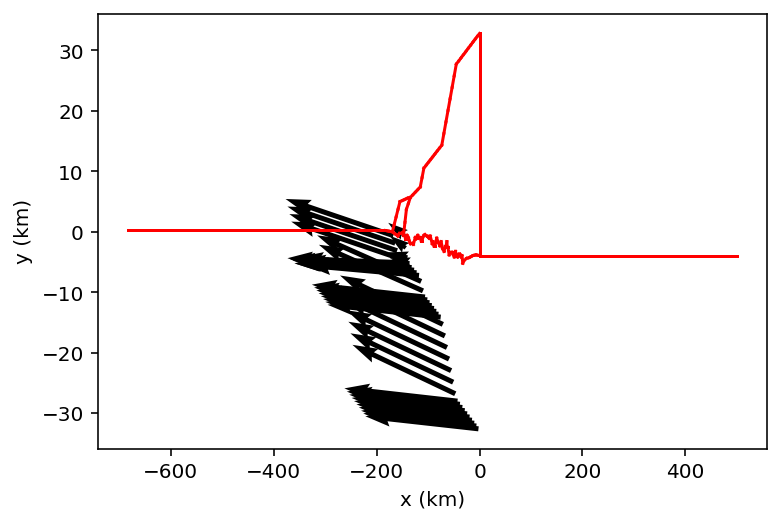

In [22]:
print(len(df_mht))
df_mht = df_mht.drop(df_mht.index[np.where(df_mht.collection == "left_edge")], axis=0)
print(len(df_mht))

print(len(df_mht))
df_mht = df_mht.drop(df_mht.index[np.where(df_mht.collection == "mct")], axis=0)
print(len(df_mht))

print(len(df_mht))
df_mht = df_mht.drop(df_mht.index[np.where(df_mht.collection == "base")], axis=0)
print(len(df_mht))


plt.figure()
for i in range(len(df_mht)):
    plt.plot(
        [df_mht.x1.values[i], df_mht.x2.values[i]],
        [-df_mht.y1.values[i], -df_mht.y2.values[i]],
        "-r",
    )
# plt.gca().set_aspect("equal")
plt.xlabel("x (km)")
plt.ylabel("y (km)")

plt.quiver(midx, midy, sx, sy, scale=1e2)
plt.show()

# Save as .csv file

In [23]:
df_mht.to_csv("mht_geometry_bcs_5_km.csv", index=False)